# Fluency Evaluation

In [1]:
def load_file(path):
    file = open(path, "r")
    sentences = file.readlines()
    sentences = [sentence.strip() for sentence in sentences]
    file.close()
    return sentences
    

## 1. Fix the Grammar Using GEC Model (CoEdIT)

In [2]:
from transformers import pipeline

In [ ]:
#load pipeline
#coedit = pipeline("text2text-generation", model="grammarly/coedit-large", tokenizer="grammarly/coedit-large", framework="pt", device=0, batch_size = 1024)

#coedit = pipeline("text2text-generation", model="grammarly/coedit-xl", tokenizer="grammarly/coedit-xl", framework="pt", device=0, batch_size = 1024)

In [ ]:
sentences = ["He use an one good cars.", "When I grow up, I start to understand what he said is quite right.",
             "They follow the way the Sun goes from the east to the west.", "I sat in the talk", "Did he wrote a letter?",
             "I like the ice cream.", "I like play basketball", "I have not the book", "We met they talked and left",
             "He use a car.", "He uses a good car.", "Did he write a letter?"]

In [10]:
sentences = load_file("/home/mlynatom/data/claim_extraction/llama2_claims.txt")
#sentences = load_file("/home/mlynatom/data/claim_extraction/llama2_finetuned_claims.txt")
print(sentences)
print(len(sentences))


['Unite said it would "use all its might" while the GMB said the outlook, confirmed at a meeting, was a "real kick in the teeth". Unless new business comes in, the south Wales site could be left in a worse case scenario with only 600 workers by 2021. The prime minister said a "dialogue" would continue with Ford about help. On Wednesday, Ford shared its five-year outlook with unions in the', 'By Andy VerityBBC economics correspondent Barclays agreed to pay Qatari investors £42m for advisory services in June 2008 after they demanded more than double the fees paid to other investors. The prosecution alleges the agreement was a mechanism to pay the additional fees rather than a genuine agreement. Roger Jenkins, Tom Kalaris and Richard Boath, on trial, deny wrongdoing. The former Barclays', 'By Joe LangstaffeBBC Wales News Vale of Glamorgan councillor, Leighton Rowlands, was accused of improper conduct for opening a Barry wine bar last year without planning permission. Mr Rowlands is standi

In [11]:
#prepare_data

task_prefix = "Fix the grammar: "
inputs = [task_prefix + sentence for sentence in sentences]

In [12]:
output = coedit(inputs, max_length=400)
output_lst = [x["generated_text"] for x in output]

In [13]:
output_lst

['Unite said it would "use all its might" while the GMB said the outlook, confirmed at a meeting, was a "real kick in the teeth". Unless new business comes in, the south Wales site could be left in a worst-case scenario with only 600 workers by 2021. The prime minister said a "dialogue" would continue with Ford about help.',
 'By Andy VerityBBC economics correspondent Barclays agreed to pay Qatari investors £42m for advisory services in June 2008 after they demanded more than double the fees paid to other investors. The prosecution alleges the agreement was a mechanism to pay the additional fees rather than a genuine agreement. Roger Jenkins, Tom Kalaris, and Richard Boath, on trial, deny wrongdoing. The former Barclays directors',
 'By Joe LangstaffeBBC Wales News Vale of Glamorgan councillor, Leighton Rowlands, was accused of improper conduct for opening a Barry wine bar last year without planning permission. Mr Rowlands is standing for election in Cardiff South and Penarth in May. I

In [14]:
out_file = open("/home/mlynatom/data/claim_extraction/llama2_claims_fixed_xl.txt", "w")
#out_file = open("/home/mlynatom/data/claim_extraction/llama2_finetuned_claims_fixed_xl.txt", "w")
out_file.writelines(line + "\n" for line in output_lst)
out_file.close()

## 2. Evaluate Fluency

In [62]:
import matplotlib.pyplot as plt
from minineedle import needle, smith, core
import jellyfish

### llama2

In [28]:
sentences = load_file("/home/mlynatom/data/claim_extraction/llama2_claims.txt")
fixed_sentences = load_file("/home/mlynatom/data/claim_extraction/llama2_claims_fixed.txt")

### llama2 finetuned

In [14]:
sentences = load_file("/home/mlynatom/data/claim_extraction/llama2_finetuned_claims.txt")
fixed_sentences = load_file("/home/mlynatom/data/claim_extraction/llama2_finetuned_claims_fixed.txt")

### llama2 coeditxl

In [29]:
sentences = load_file("/home/mlynatom/data/claim_extraction/llama2_claims.txt")
fixed_sentences2 = load_file("/home/mlynatom/data/claim_extraction/llama2_claims_fixed_xl.txt")

### llama2 finetuned coeditxl

In [15]:
sentences = load_file("/home/mlynatom/data/claim_extraction/llama2_finetuned_claims.txt")
fixed_sentences = load_file("/home/mlynatom/data/claim_extraction/llama2_finetuned_claims_fixed_xl.txt")

### view data

In [10]:
sentences

['Ford has warned it could cut up to 1,700 jobs at its Bridgend engine plant in south Wales.',
 'A former Barclays executive on trial for fraud has told the jury he was "far removed from the top" and had no decision-making authority.',
 'A Conservative councillor who opened a bar without planning permission has been found to have breached the code of conduct.',
 'Diseases carried by commercial bees could be a threat to wild pollinators, a study suggests.',
 'The leader of a Devon council has been sacked by his own party.',
 "Two Iranian footballers have been banned for life after appearing to squeeze each other's bottoms during a match.",
 'A former soldier who was detained and threatened with deportation to Fiji has been granted the right to stay in the UK.',
 'A masterplan to revitalise a town centre has been given the go-ahead by councillors.',
 'Children are having too many teeth removed because of tooth decay, a report has found.',
 'The number of opioid painkillers prescribed in 

In [30]:
import numpy as np
fixed_sentences = np.array(fixed_sentences)
fixed_sentences2 = np.array(fixed_sentences2)
sentences = np.array(sentences)
bool_ind = np.array(fixed_sentences) != np.array(fixed_sentences2)

In [43]:
sentences[bool_ind][-5]

'No more countries will be added to the green list and Portugal will be relegated to amber from next Tuesday. A government announcement on the changes to its holiday traffic light system is due later on Thursday. But already critics have warned of a further hit to jobs and confidence, while airline Easyjet said the government had torn up its own rules. Moving Portugal from the green to the amber list was a "safety first approach" to'

In [44]:
fixed_sentences[bool_ind][-5]

'No more countries will be added to the green list, and Portugal will be relegated to amber from next Tuesday. A government announcement on the changes to its holiday traffic light system is due later on Thursday. But already critics have warned of a further hit to jobs and confidence, while airline Easyjet said the government had torn up its own rules.'

In [45]:
fixed_sentences2[bool_ind][-5]

'No more countries will be added to the green list, and Portugal will be relegated to amber from next Tuesday. A government announcement on the changes to its holiday traffic light system is due later on Thursday. But already, critics have warned of a further hit to jobs and confidence, while airline Easyjet said the government had torn up its own rules.'

In [11]:
fixed_sentences

['Ford has warned it could cut up to 1,700 jobs at its Bridgend engine plant in south Wales.',
 'A former Barclays executive on trial for fraud has told the jury he was "far removed from the top" and had no decision-making authority.',
 'A Conservative councillor who opened a bar without planning permission has been found to have breached the code of conduct.',
 'Diseases carried by commercial bees could be a threat to wild pollinators, a study suggests.',
 'The leader of a Devon council has been sacked by his own party.',
 "Two Iranian footballers have been banned for life after appearing to squeeze each other's bottoms during a match.",
 'A former soldier who was detained and threatened with deportation to Fiji has been granted the right to stay in the UK.',
 'A masterplan to revitalise a town center has been given the go-ahead by councillors.',
 'Children are having too many teeth removed because of tooth decay, a report has found.',
 'The number of opioid painkillers prescribed in 

In [13]:
fixed_sentences

['Ford has warned it could cut up to 1,700 jobs at its Bridgend engine plant in south Wales.',
 'A former Barclays executive on trial for fraud told the jury he was "far removed from the top" and had no decision-making authority.',
 'A Conservative councillor who opened a bar without planning permission has been found to have breached the code of conduct.',
 'Diseases carried by commercial bees could be a threat to wild pollinators, a study suggests.',
 'The leader of a Devon council has been sacked by his own party.',
 "Two Iranian footballers have been banned for life after appearing to squeeze each other's bottoms during a match.",
 'A former soldier who was detained and threatened with deportation to Fiji has been granted the right to stay in the UK.',
 'A masterplan to revitalise a town center has been given the go-ahead by councillors.',
 'Children are having too many teeth removed because of tooth decay, a report has found.',
 'The number of opioid painkillers prescribed in Engl

In [35]:
output_lst=['He uses only one good car.',
 'When I grow up, I will start to understand what he said is quite right.',
 'They follow the way the sun goes from the east to the west.',
 'I sat in the talk.',
 'Did he write a letter?',
 'I like the ice cream.',
 'I like to play basketball.',
 'I have not not read the book yet.',
 'We met; they talked and left.',
 'He will use a car.',
 'He uses a good car.',
 'Did he write a letter?']

### Needleman–Wunsch algorithm

In [51]:
s1 = sentences[1]
s2 = fixed_sentences[1]

s1 = "He use car two good"
s2 = "He uses two good cars."

alignment: needle.NeedlemanWunsch[str] = needle.NeedlemanWunsch(s1, s2)

In [52]:
alignment.align()

In [53]:
alignment.get_score()

5

In [54]:
al1, al2 = alignment.get_aligned_sequences(core.AlignmentFormat.list)

In [55]:
print(alignment)

Alignment of SEQUENCE 1 and SEQUENCE 2:
	He use car two good------
	He use---s two good cars.



### Smith-Waterman algorithm

In [57]:
s1 = sentences[1]
s2 = fixed_sentences[1]

s1 = "He use car two good"
s2 = "He uses two good cars."

alignment: smith.SmithWaterman[str] = smith.SmithWaterman(s1, s2)

In [58]:
al1, al2 = alignment.get_aligned_sequences(core.AlignmentFormat.list)

In [60]:
alignment.get_score()

11

In [59]:
print(alignment)

Alignment of SEQUENCE 1 and SEQUENCE 2:
	He use car two good
	He use---s two good



### Jaccard Similarity

In [6]:
def jaccard_similarity(str1:str, str2: str) -> float:
    """
    Computes Jaccard similarity (index) of 2 strings. 
    https://en.wikipedia.org/wiki/Jaccard_index
    """
    set1 = set(str1.split())
    set2 = set(str2.split())

    intersection = set1.intersection(set2)
    union = set1.union(set2)
    j_sim = len(intersection)/len(union)
    return j_sim

In [32]:
jac_results = [jaccard_similarity(sentences[i], fixed_sentences[i]) for i in range(len(sentences))]

In [33]:
print(jac_results)

[1.0, 0.9565217391304348, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8666666666666667, 1.0, 1.0, 1.0, 0.95, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9615384615384616, 1.0, 0.8571428571428571, 1.0, 1.0, 0.9444444444444444, 1.0, 1.0, 1.0, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.95, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.875, 1.0, 0.8333333333333334, 1.0, 0.6666666666666666, 0.9, 1.0, 0.7894736842105263, 1.0, 1.0, 0.8571428571428571, 0.9166666666666666, 1.0, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 0.9375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9047619047619048, 0.8636363636363636, 0.8888888888888888, 1.0, 0.9565217391304348, 0.9090909090909091]


not finetuned

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,
         1.,  1.,  0.,  0.,  2.,  1.,  1.,  3.,  2.,  1.,  0.,  2.,  1.,
         2.,  2.,  1.,  1.,  0.,  2.,  2.,  0.,  2.,  0.,  3.,  2.,  3.,
         5.,  0.,  3.,  1.,  2.,  0.,  2.,  1.,  0.,  3.,  9.,  3.,  0.,
         0.,  2.,  4.,  3.,  0.,  0.,  0.,  0., 13.]),
 array([0.71428571, 0.71714286, 0.72      , 0.72285714, 0.72571429,
        0.72857143, 0.73142857, 0.73428571, 0.73714286, 0.74      ,
        0.74285714, 0.74571429, 0.74857143, 0.75142857, 0.75428571,
        0.75714286, 0.76      , 0.76285714, 0.76571429, 0.76857143,
        0.77142857, 0.77428571, 0.77714286, 0.78      , 0.78285714,
        0.78571429, 0.78857143, 0.79142857, 0.79428571, 0.79714286,
        0.8       , 0.8028

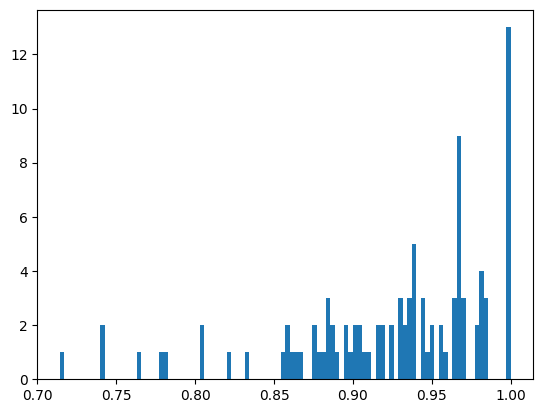

In [12]:
plt.hist(jac_results, bins=100)

finetuned

(array([ 3.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 84.]),
 array([0.85714286, 0.85857143, 0.86      , 0.86142857, 0.86285714,
        0.86428571, 0.86571429, 0.86714286, 0.86857143, 0.87      ,
        0.87142857, 0.87285714, 0.87428571, 0.87571429, 0.87714286,
        0.87857143, 0.88      , 0.88142857, 0.88285714, 0.88428571,
        0.88571429, 0.88714286, 0.88857143, 0.89      , 0.89142857,
        0.89285714, 0.89428571, 0.89571429, 0.89714286, 0.89857143,
        0.9       , 0.9014

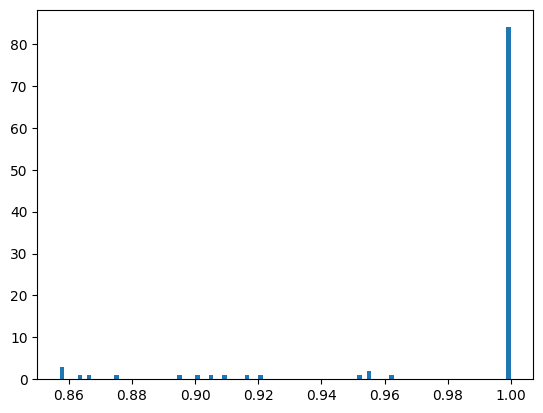

In [38]:
plt.hist(jac_results, bins=100)

not finetued xl

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         3.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  2.,  2.,  1.,
         2.,  1.,  0.,  3.,  0.,  3.,  3.,  5.,  4.,  7.,  3.,  6.,  5.,
         3.,  3.,  7.,  5., 10.,  4.,  3.,  1.,  9.]),
 array([0.14035088, 0.14894737, 0.15754386, 0.16614035, 0.17473684,
        0.18333333, 0.19192982, 0.20052632, 0.20912281, 0.2177193 ,
        0.22631579, 0.23491228, 0.24350877, 0.25210526, 0.26070175,
        0.26929825, 0.27789474, 0.28649123, 0.29508772, 0.30368421,
        0.3122807 , 0.32087719, 0.32947368, 0.33807018, 0.34666667,
        0.35526316, 0.36385965, 0.37245614, 0.38105263, 0.38964912,
        0.39824561, 0.4068

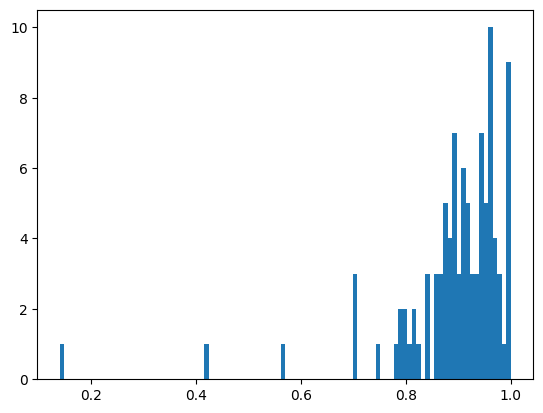

In [11]:
plt.hist(jac_results, bins=100)

finetuned xl

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  3.,  0.,  1.,  1.,  0.,  2.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  2.,  0.,  2.,  2.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 76.]),
 array([0.66666667, 0.67      , 0.67333333, 0.67666667, 0.68      ,
        0.68333333, 0.68666667, 0.69      , 0.69333333, 0.69666667,
        0.7       , 0.70333333, 0.70666667, 0.71      , 0.71333333,
        0.71666667, 0.72      , 0.72333333, 0.72666667, 0.73      ,
        0.73333333, 0.73666667, 0.74      , 0.74333333, 0.74666667,
        0.75      , 0.75333333, 0.75666667, 0.76      , 0.76333333,
        0.76666667, 0.77  

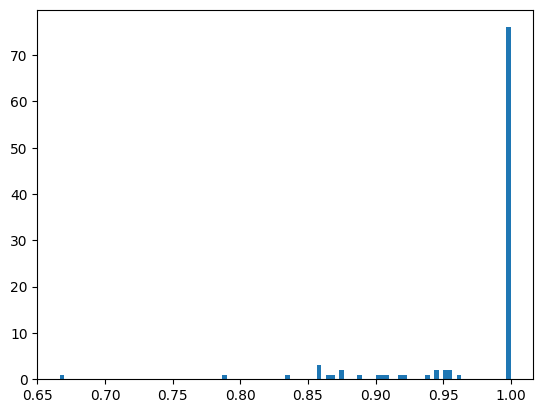

In [34]:
plt.hist(jac_results, bins=100)

### Levenshtein Distance

In [ ]:
%pip install levenshtein

In [35]:
from Levenshtein import distance

In [36]:
lev_results = [distance(sentences[i], fixed_sentences[i]) for i in range(len(sentences))]

In [37]:
lev_results

[0,
 4,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 2,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 3,
 0,
 3,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 13,
 2,
 6,
 2,
 0,
 4,
 1]

(array([25.,  8.,  6.,  7., 12.,  4.,  5.,  3.,  1.,  2.,  3.,  1.,  1.,
         1.,  0.,  0.,  4.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.  ,   1.24,   2.48,   3.72,   4.96,   6.2 ,   7.44,   8.68,
          9.92,  11.16,  12.4 ,  13.64,  14.88,  16.12,  17.36,  18.6 ,
         19.84,  21.08,  22.32,  23.56,  24.8 ,  26.04,  27.28,  28.52,
         29.76,  31.  ,  32.24,  33.48,  34.72,  35.96,  37.2 ,  38.44,
         39.68,  40.92,  42.16,  43.4 ,  44.64,  45.88,  47.12,  48.36,
         49.6 ,  50.84,  52.08,  53.32,  54.56,  55.8 ,  57.04,  58.28,
  

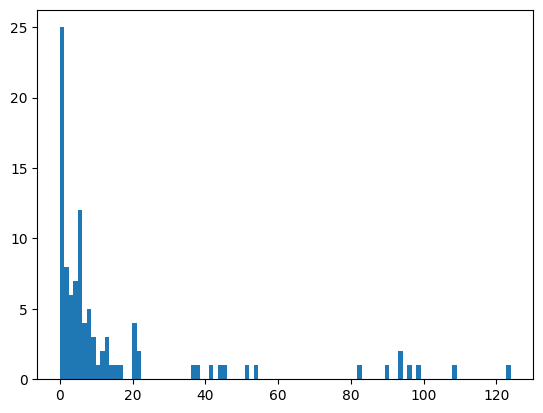

In [17]:
plt.hist(lev_results, 100)

(array([84.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ,
        0.66, 0.72, 0.78, 0.84, 0.9 , 0.96, 1.02, 1.08, 1.14, 1.2 , 1.26,
        1.32, 1.38, 1.44, 1.5 , 1.56, 1.62, 1.68, 1.74, 1.8 , 1.86, 1.92,
        1.98, 2.04, 2.1 , 2.16, 2.22, 2.28, 2.34, 2.4 , 2.46, 2.52, 2.58,
        2.64, 2.7 , 2.76, 2.82, 2.88, 2.94, 3.  , 3.06, 3.12, 3.18, 3.24,
        3.3 , 3.36, 3.42, 3.48, 3.54, 3.6 , 3.66, 3.72, 3.78, 3.

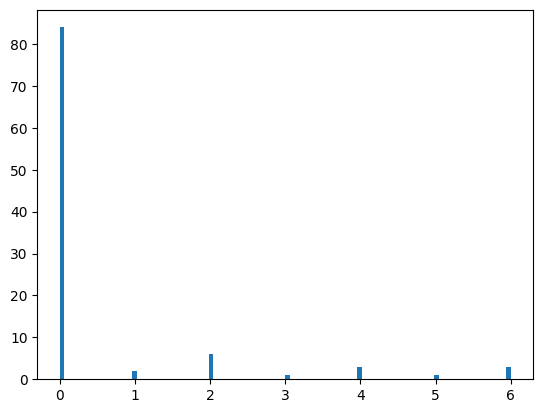

In [41]:
plt.hist(lev_results, 100)

(array([22., 13., 16.,  9.,  7.,  3.,  2.,  0.,  3.,  2.,  0.,  1.,  1.,
         2.,  1.,  2.,  0.,  0.,  1.,  2.,  0.,  2.,  1.,  0.,  1.,  1.,
         1.,  1.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.  ,   3.73,   7.46,  11.19,  14.92,  18.65,  22.38,  26.11,
         29.84,  33.57,  37.3 ,  41.03,  44.76,  48.49,  52.22,  55.95,
         59.68,  63.41,  67.14,  70.87,  74.6 ,  78.33,  82.06,  85.79,
         89.52,  93.25,  96.98, 100.71, 104.44, 108.17, 111.9 , 115.63,
        119.36, 123.09, 126.82, 130.55, 134.28, 138.01, 141.74, 145.47,
        149.2 , 152.93, 156.66, 160.39, 164.12, 167.85, 171.58, 175.31,
  

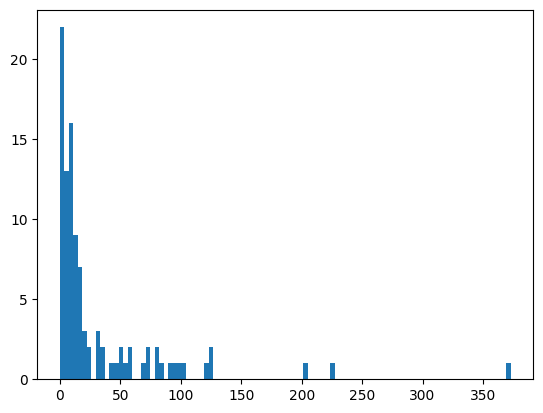

In [19]:
plt.hist(lev_results, bins=100)

(array([76.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.  ,  0.13,  0.26,  0.39,  0.52,  0.65,  0.78,  0.91,  1.04,
         1.17,  1.3 ,  1.43,  1.56,  1.69,  1.82,  1.95,  2.08,  2.21,
         2.34,  2.47,  2.6 ,  2.73,  2.86,  2.99,  3.12,  3.25,  3.38,
         3.51,  3.64,  3.77,  3.9 ,  4.03,  4.16,  4.29,  4.42,  4.55,
         4.68,  4.81,  4.94,  5.07,  5.2 ,  5.33,  5.46,  5.59,  5.72,
         5.85,  5.98,  6.11,  6.24,  6.37,  6.5 ,  6.63,  6.76,  6.89,
        

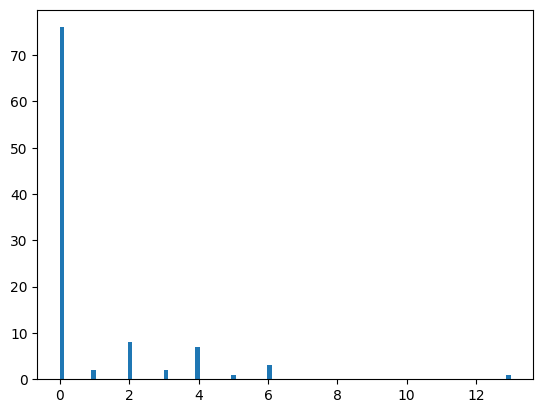

In [38]:
plt.hist(lev_results, 100)

### Damerau-Levenshtein distance

In [63]:
dam_results = [jellyfish.damerau_levenshtein_distance(sentences[i], fixed_sentences[i]) for i in range(len(sentences))]

(array([28.,  9.,  7.,  4., 10.,  5.,  5.,  2.,  1.,  3.,  2.,  1.,  1.,
         1.,  0.,  0.,  5.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.  ,   1.24,   2.48,   3.72,   4.96,   6.2 ,   7.44,   8.68,
          9.92,  11.16,  12.4 ,  13.64,  14.88,  16.12,  17.36,  18.6 ,
         19.84,  21.08,  22.32,  23.56,  24.8 ,  26.04,  27.28,  28.52,
         29.76,  31.  ,  32.24,  33.48,  34.72,  35.96,  37.2 ,  38.44,
         39.68,  40.92,  42.16,  43.4 ,  44.64,  45.88,  47.12,  48.36,
         49.6 ,  50.84,  52.08,  53.32,  54.56,  55.8 ,  57.04,  58.28,
  

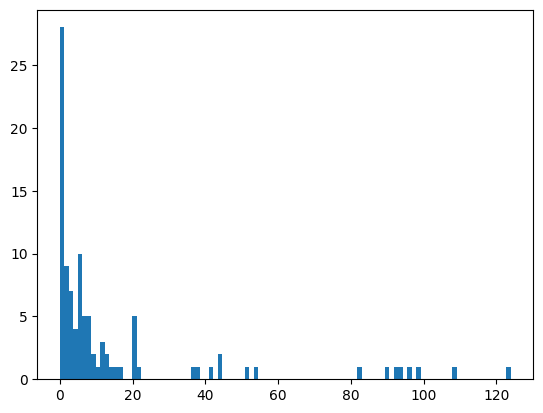

In [64]:
plt.hist(dam_results, 100)

### jaro distance

In [65]:
jaro_results = [jellyfish.jaro_similarity(sentences[i], fixed_sentences[i]) for i in range(len(sentences))]

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         2.,  0.,  1.,  0.,  1.,  0.,  1.,  2.,  1.,  1.,  1.,  0.,  0.,
         1.,  2.,  0.,  0.,  0.,  2.,  2.,  1.,  2.,  0.,  0.,  1.,  0.,
         1.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  5.,  1.,  2.,  0.,  0.,
         1.,  0.,  2.,  0.,  0.,  1.,  2.,  2.,  1.,  2.,  0.,  2.,  0.,
         0.,  3.,  2.,  0.,  5.,  2.,  5.,  4., 26.]),
 array([0.76361143, 0.76597531, 0.7683392 , 0.77070308, 0.77306697,
        0.77543085, 0.77779474, 0.78015863, 0.78252251, 0.7848864 ,
        0.78725028, 0.78961417, 0.79197805, 0.79434194, 0.79670583,
        0.79906971, 0.8014336 , 0.80379748, 0.80616137, 0.80852525,
        0.81088914, 0.81325303, 0.81561691, 0.8179808 , 0.82034468,
        0.82270857, 0.82507245, 0.82743634, 0.82980023, 0.83216411,
        0.834528  , 0.8368

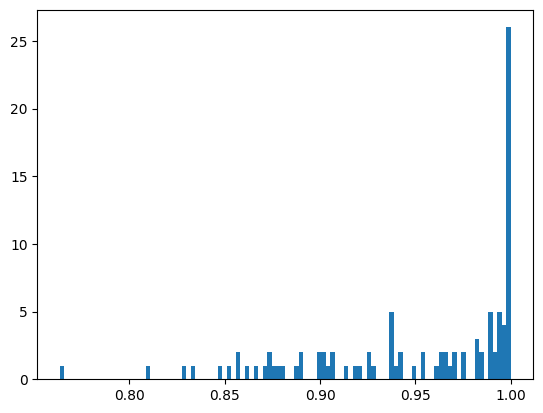

In [66]:
plt.hist(jaro_results, 100)

### Jaro-Winkler distance

In [67]:
jaro_w_results = [jellyfish.jaro_winkler_similarity(sentences[i], fixed_sentences[i]) for i in range(len(sentences))]

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  1.,  2.,  0.,  1.,  0.,  0.,  1.,  3.,  1.,  1.,  0.,  2.,
         1.,  0.,  1.,  3.,  1.,  2.,  0.,  1.,  0.,  2.,  0.,  2.,  1.,
         0.,  1.,  4.,  3.,  0.,  1.,  0.,  2.,  0.,  1.,  3.,  1.,  3.,
         0.,  2.,  0.,  4.,  1.,  5.,  3.,  4., 30.]),
 array([0.81088914, 0.81278025, 0.81467136, 0.81656247, 0.81845357,
        0.82034468, 0.82223579, 0.8241269 , 0.82601801, 0.82790912,
        0.82980023, 0.83169133, 0.83358244, 0.83547355, 0.83736466,
        0.83925577, 0.84114688, 0.84303799, 0.8449291 , 0.8468202 ,
        0.84871131, 0.85060242, 0.85249353, 0.85438464, 0.85627575,
        0.85816686, 0.86005796, 0.86194907, 0.86384018, 0.86573129,
        0.8676224 , 0.8695

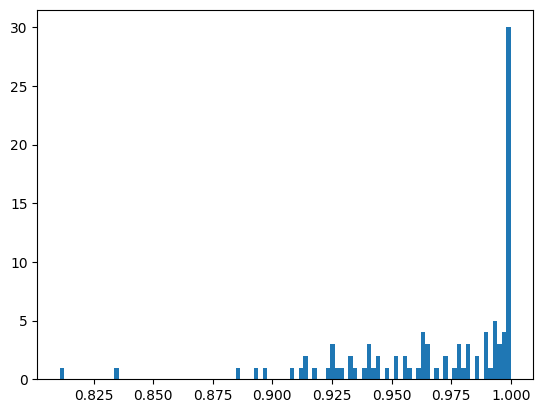

In [68]:
plt.hist(jaro_w_results, 100)

## String Similarity

In [39]:
from difflib import SequenceMatcher

def str_similarity(str1: str, str2: str) -> float:
    m = SequenceMatcher(None, str1, str2)
    return m.ratio()

In [40]:
sim_results = [str_similarity(sentences[i], fixed_sentences[i]) for i in range(len(sentences))]

In [41]:
sim_results

[1.0,
 0.9850746268656716,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9880952380952381,
 1.0,
 1.0,
 1.0,
 0.9799196787148594,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9871794871794872,
 1.0,
 0.9880952380952381,
 1.0,
 1.0,
 0.9791666666666666,
 1.0,
 1.0,
 1.0,
 0.9761092150170648,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9830508474576272,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9691629955947136,
 1.0,
 0.9775280898876404,
 1.0,
 0.968944099378882,
 0.9920634920634921,
 1.0,
 0.9789473684210527,
 1.0,
 1.0,
 0.9859154929577465,
 0.9921259842519685,
 1.0,
 0.9948186528497409,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9688888888888889,
 0.9818181818181818,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9446808510638298,
 0.9900990099009901,
 0.9737827715355806,
 0.9863013698630136,
 1.0,
 0.9858156028368794,
 0.9965870307167235]

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  4.,  1.,
         0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,
         3.,  1.,  0.,  2.,  6.,  4.,  5., 20., 44.]),
 array([0.34343434, 0.35      , 0.35656566, 0.36313131, 0.36969697,
        0.37626263, 0.38282828, 0.38939394, 0.3959596 , 0.40252525,
        0.40909091, 0.41565657, 0.42222222, 0.42878788, 0.43535354,
        0.44191919, 0.44848485, 0.45505051, 0.46161616, 0.46818182,
        0.47474747, 0.48131313, 0.48787879, 0.49444444, 0.5010101 ,
        0.50757576, 0.51414141, 0.52070707, 0.52727273, 0.53383838,
        0.54040404, 0.5469

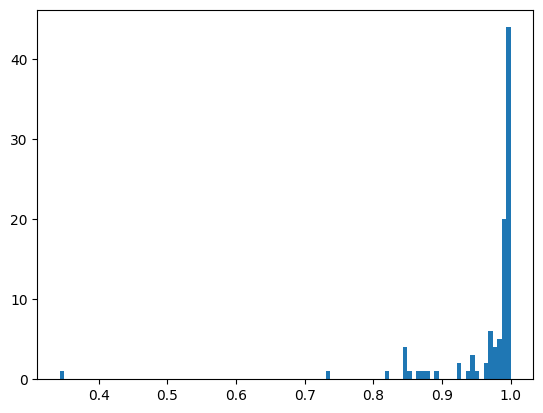

In [21]:
plt.hist(sim_results, 100)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 84.]),
 array([0.96888889, 0.9692    , 0.96951111, 0.96982222, 0.97013333,
        0.97044444, 0.97075556, 0.97106667, 0.97137778, 0.97168889,
        0.972     , 0.97231111, 0.97262222, 0.97293333, 0.97324444,
        0.97355556, 0.97386667, 0.97417778, 0.97448889, 0.9748    ,
        0.97511111, 0.97542222, 0.97573333, 0.97604444, 0.97635556,
        0.97666667, 0.97697778, 0.97728889, 0.9776    , 0.97791111,
        0.97822222, 0.9785

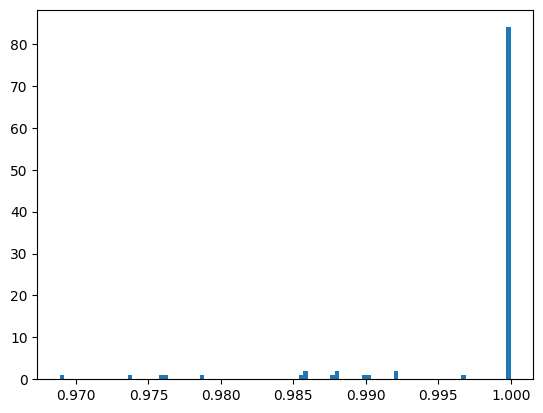

In [44]:
plt.hist(sim_results, 100)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  1.,  0.,  2.,  1.,  1.,  1.,  3.,  3.,  1.,  0.,  3.,
         3.,  1.,  2.,  3.,  3.,  3., 11., 22., 30.]),
 array([0.17142857, 0.17971429, 0.188     , 0.19628571, 0.20457143,
        0.21285714, 0.22114286, 0.22942857, 0.23771429, 0.246     ,
        0.25428571, 0.26257143, 0.27085714, 0.27914286, 0.28742857,
        0.29571429, 0.304     , 0.31228571, 0.32057143, 0.32885714,
        0.33714286, 0.34542857, 0.35371429, 0.362     , 0.37028571,
        0.37857143, 0.38685714, 0.39514286, 0.40342857, 0.41171429,
        0.42      , 0.4282

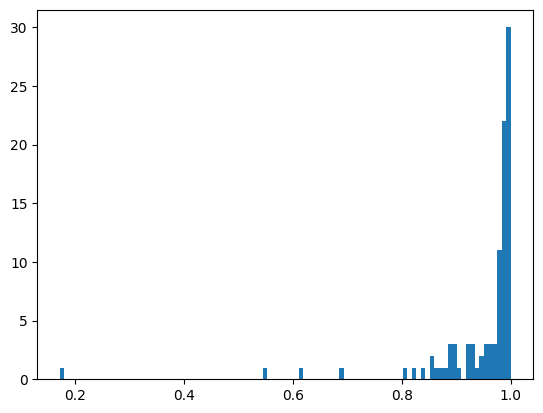

In [20]:
plt.hist(sim_results, 100)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  2.,  1.,  1.,  0.,
         2.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0., 76.]),
 array([0.94468085, 0.94523404, 0.94578723, 0.94634043, 0.94689362,
        0.94744681, 0.948     , 0.94855319, 0.94910638, 0.94965957,
        0.95021277, 0.95076596, 0.95131915, 0.95187234, 0.95242553,
        0.95297872, 0.95353191, 0.95408511, 0.9546383 , 0.95519149,
        0.95574468, 0.95629787, 0.95685106, 0.95740426, 0.95795745,
        0.95851064, 0.95906383, 0.95961702, 0.96017021, 0.9607234 ,
        0.9612766 , 0.9618

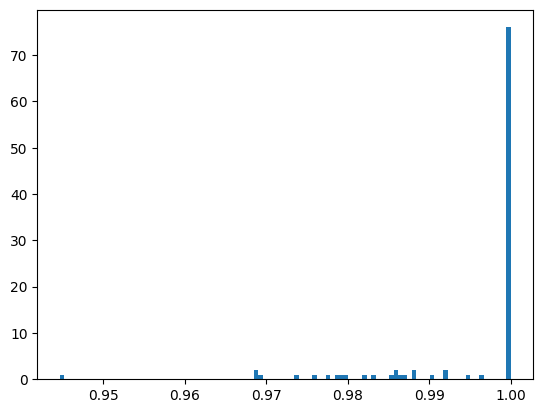

In [42]:
plt.hist(sim_results, 100)

### Correct

In [21]:
def is_correct(str1:str, str2:str) -> bool:
    return str1==str2

In [43]:
iscorrect_results = [is_correct(sentences[i], fixed_sentences[i]) for i in range(len(sentences))]

In [44]:
iscorrect_results

[True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False]

In [27]:
import numpy as np

np.unique(iscorrect_results, return_counts=True)

(array([False,  True]), array([90, 10]))

In [47]:
np.unique(iscorrect_results, return_counts=True)

(array([False,  True]), array([16, 84]))

In [24]:
import numpy as np

np.unique(iscorrect_results, return_counts=True)

(array([False,  True]), array([91,  9]))

In [45]:
np.unique(iscorrect_results, return_counts=True)

(array([False,  True]), array([24, 76]))

## MaxSIM + count correct -> percentage

In [46]:
from Levenshtein import distance
import numpy as np

def percentage_correct(str1: str, str2:str) -> float:
    words1 = np.array(str1.split())
    words2 = np.array(str2.split())

    if len(words1) >= len(words2):
        iter_words1 = words1
        iter_words2 = words2
    else:
        iter_words1 = words2
        iter_words2 = words1

    def closest_word(word: str):
        lambda_distances = np.vectorize(lambda x: distance(word, x))
        distances = lambda_distances(iter_words2)
        return iter_words2[np.argmin(distances)]
    
    vclosest_word = np.vectorize(closest_word)

    cmp_words1 = iter_words1
    cmp_words2 = vclosest_word(iter_words1)

    is_same = cmp_words1 == cmp_words2

    return np.sum(is_same)/len(cmp_words1)

In [47]:
maxsim_results = [percentage_correct(sentences[i], fixed_sentences[i]) for i in range(len(sentences))]

In [48]:
maxsim_results

[1.0,
 0.9583333333333334,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9285714285714286,
 1.0,
 1.0,
 1.0,
 0.95,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9629629629629629,
 1.0,
 0.9285714285714286,
 1.0,
 1.0,
 0.95,
 1.0,
 1.0,
 1.0,
 0.96,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.95,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9166666666666666,
 1.0,
 0.8888888888888888,
 1.0,
 0.7692307692307693,
 0.9523809523809523,
 1.0,
 0.8888888888888888,
 1.0,
 1.0,
 0.9230769230769231,
 0.9642857142857143,
 1.0,
 0.9333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9047619047619048,
 0.9411764705882353,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9545454545454546,
 0.9523809523809523,
 0.9166666666666666,
 0.9473684210526315,
 1.0,
 0.9565217391304348,
 0.9545454545454546]

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  2.,  0.,  1.,  4.,  2.,
         1.,  3.,  3.,  2.,  2.,  1.,  1.,  0.,  6.,  8.,  5.,  0.,  0.,
         2.,  3., 14.,  6.,  0.,  0.,  0.,  0., 15.]),
 array([0.76666667, 0.769     , 0.77133333, 0.77366667, 0.776     ,
        0.77833333, 0.78066667, 0.783     , 0.78533333, 0.78766667,
        0.79      , 0.79233333, 0.79466667, 0.797     , 0.79933333,
        0.80166667, 0.804     , 0.80633333, 0.80866667, 0.811     ,
        0.81333333, 0.81566667, 0.818     , 0.82033333, 0.82266667,
        0.825     , 0.82733333, 0.82966667, 0.832     , 0.83433333,
        0.83666667, 0.839 

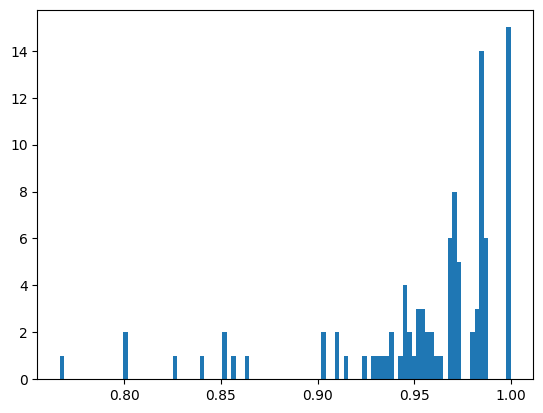

In [31]:
plt.hist(maxsim_results, 100)

In [32]:
np.unique(maxsim_results, return_counts=True)

(array([0.76666667, 0.8       , 0.82539683, 0.84057971, 0.85074627,
        0.85245902, 0.85714286, 0.86363636, 0.90277778, 0.90322581,
        0.90909091, 0.91071429, 0.91549296, 0.92307692, 0.92957746,
        0.93103448, 0.93442623, 0.93650794, 0.9375    , 0.93902439,
        0.94366197, 0.94444444, 0.94545455, 0.94594595, 0.94805195,
        0.94915254, 0.9516129 , 0.953125  , 0.95384615, 0.95522388,
        0.95588235, 0.95652174, 0.95890411, 0.95945946, 0.96153846,
        0.96363636, 0.96774194, 0.96875   , 0.96923077, 0.96969697,
        0.97058824, 0.97101449, 0.97183099, 0.97260274, 0.97297297,
        0.97333333, 0.97916667, 0.98039216, 0.98181818, 0.98214286,
        0.98360656, 0.984375  , 0.98484848, 0.98550725, 0.98571429,
        0.98591549, 0.98630137, 0.98666667, 0.98684211, 0.98701299,
        0.98734177, 1.        ]),
 array([ 1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  2,  2,  1,  1,  1,  1,  1

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,
         2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 85.]),
 array([0.9047619 , 0.90571429, 0.90666667, 0.90761905, 0.90857143,
        0.90952381, 0.91047619, 0.91142857, 0.91238095, 0.91333333,
        0.91428571, 0.9152381 , 0.91619048, 0.91714286, 0.91809524,
        0.91904762, 0.92      , 0.92095238, 0.92190476, 0.92285714,
        0.92380952, 0.9247619 , 0.92571429, 0.92666667, 0.92761905,
        0.92857143, 0.92952381, 0.93047619, 0.93142857, 0.93238095,
        0.93333333, 0.9342

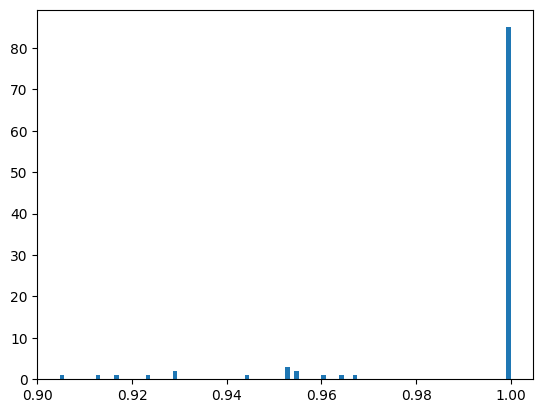

In [51]:
plt.hist(maxsim_results, 100)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
         0.,  0.,  1.,  2.,  3.,  0.,  2.,  0.,  2.,  3.,  2.,  2.,  2.,
         2.,  8.,  9., 10.,  2., 17.,  6., 10.,  9.]),
 array([0.18309859, 0.19126761, 0.19943662, 0.20760563, 0.21577465,
        0.22394366, 0.23211268, 0.24028169, 0.2484507 , 0.25661972,
        0.26478873, 0.27295775, 0.28112676, 0.28929577, 0.29746479,
        0.3056338 , 0.31380282, 0.32197183, 0.33014085, 0.33830986,
        0.34647887, 0.35464789, 0.3628169 , 0.37098592, 0.37915493,
        0.38732394, 0.39549296, 0.40366197, 0.41183099, 0.42      ,
        0.42816901, 0.4363

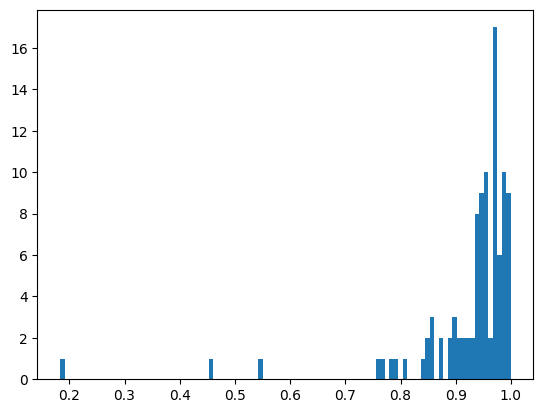

In [28]:
plt.hist(maxsim_results, 100)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,
         0.,  1.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
         3.,  2.,  2.,  2.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 76.]),
 array([0.76923077, 0.77153846, 0.77384615, 0.77615385, 0.77846154,
        0.78076923, 0.78307692, 0.78538462, 0.78769231, 0.79      ,
        0.79230769, 0.79461538, 0.79692308, 0.79923077, 0.80153846,
        0.80384615, 0.80615385, 0.80846154, 0.81076923, 0.81307692,
        0.81538462, 0.81769231, 0.82      , 0.82230769, 0.82461538,
        0.82692308, 0.82923077, 0.83153846, 0.83384615, 0.83615385,
        0.83846154, 0.8407

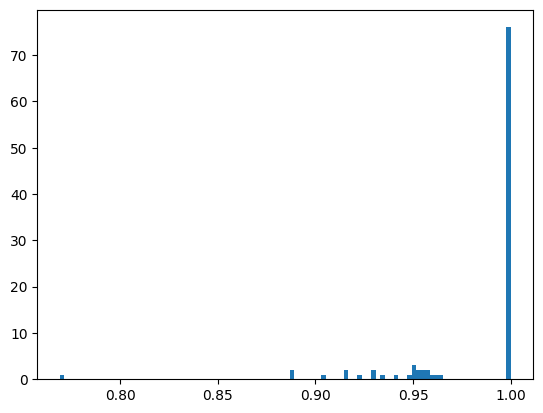

In [49]:
plt.hist(maxsim_results, 100)

## Results

In [12]:
jac_results

[0.3333333333333333,
 0.9285714285714286,
 0.8181818181818182,
 0.6666666666666666,
 0.6666666666666666,
 1.0,
 0.5,
 0.7142857142857143,
 0.5,
 0.8,
 1.0,
 1.0]

In [13]:
lev_results

[5, 5, 1, 1, 1, 0, 4, 14, 2, 5, 0, 0]

In [21]:
sim_results

[0.88,
 0.9635036496350365,
 0.9830508474576272,
 0.9714285714285714,
 0.9545454545454546,
 1.0,
 0.9166666666666666,
 0.7307692307692307,
 0.9642857142857143,
 0.8387096774193549,
 1.0,
 1.0]

In [24]:
iscorrect_results

[False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True]